In [ ]:
# MNIST Classification using CNN in TensorFlow/Keras

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model
from google.colab import drive
drive.mount('/content/drive')

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape to fit CNN input shape (28x28 images with 1 channel)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 51ms/step - accuracy: 0.8501 - loss: 0.4849 - val_accuracy: 0.9826 - val_loss: 0.0563
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 53ms/step - accuracy: 0.9734 - loss: 0.0873 - val_accuracy: 0.9865 - val_loss: 0.0385
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - accuracy: 0.9810 - loss: 0.0663 - val_accuracy: 0.9893 - val_loss: 0.0322
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.9856 - loss: 0.0490 - val_accuracy: 0.9875 - val_loss: 0.0401
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.9879 - loss: 0.0410 - val_accuracy: 0.9911 - val_loss: 0.0279
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.9894 - loss: 0.0367 - val_accuracy: 0.9911 - val_loss: 0.0274
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.9903 - loss: 0.0322 - val_accuracy: 0.9921 - val_loss: 0.0230
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 52ms/step - accuracy: 0.9915 - loss: 0.0275 - 

Test Accuracy: 99.25%
Model saved successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


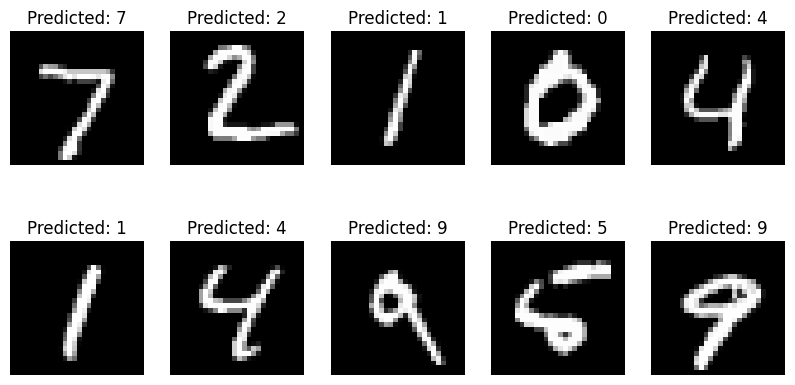

In [ ]:
# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 digit classes
])

# **Print Model Architecture**
model.summary()

plot_model(model,show_shapes=True,show_layer_names=True)

# **Visualize Model as a Diagram**
plot_model(model, to_file="model_architecture.png", show_shapes=True, show_layer_names=True)


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Save model
model.save("/content/drive/My Drive/mnist_cnn.h5")
print("Model saved successfully!")

# Predict on test images
predictions = model.predict(x_test[:10])

# Plot some predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Predicted: {np.argmax(predictions[i])}")
    ax.axis("off")
plt.show()

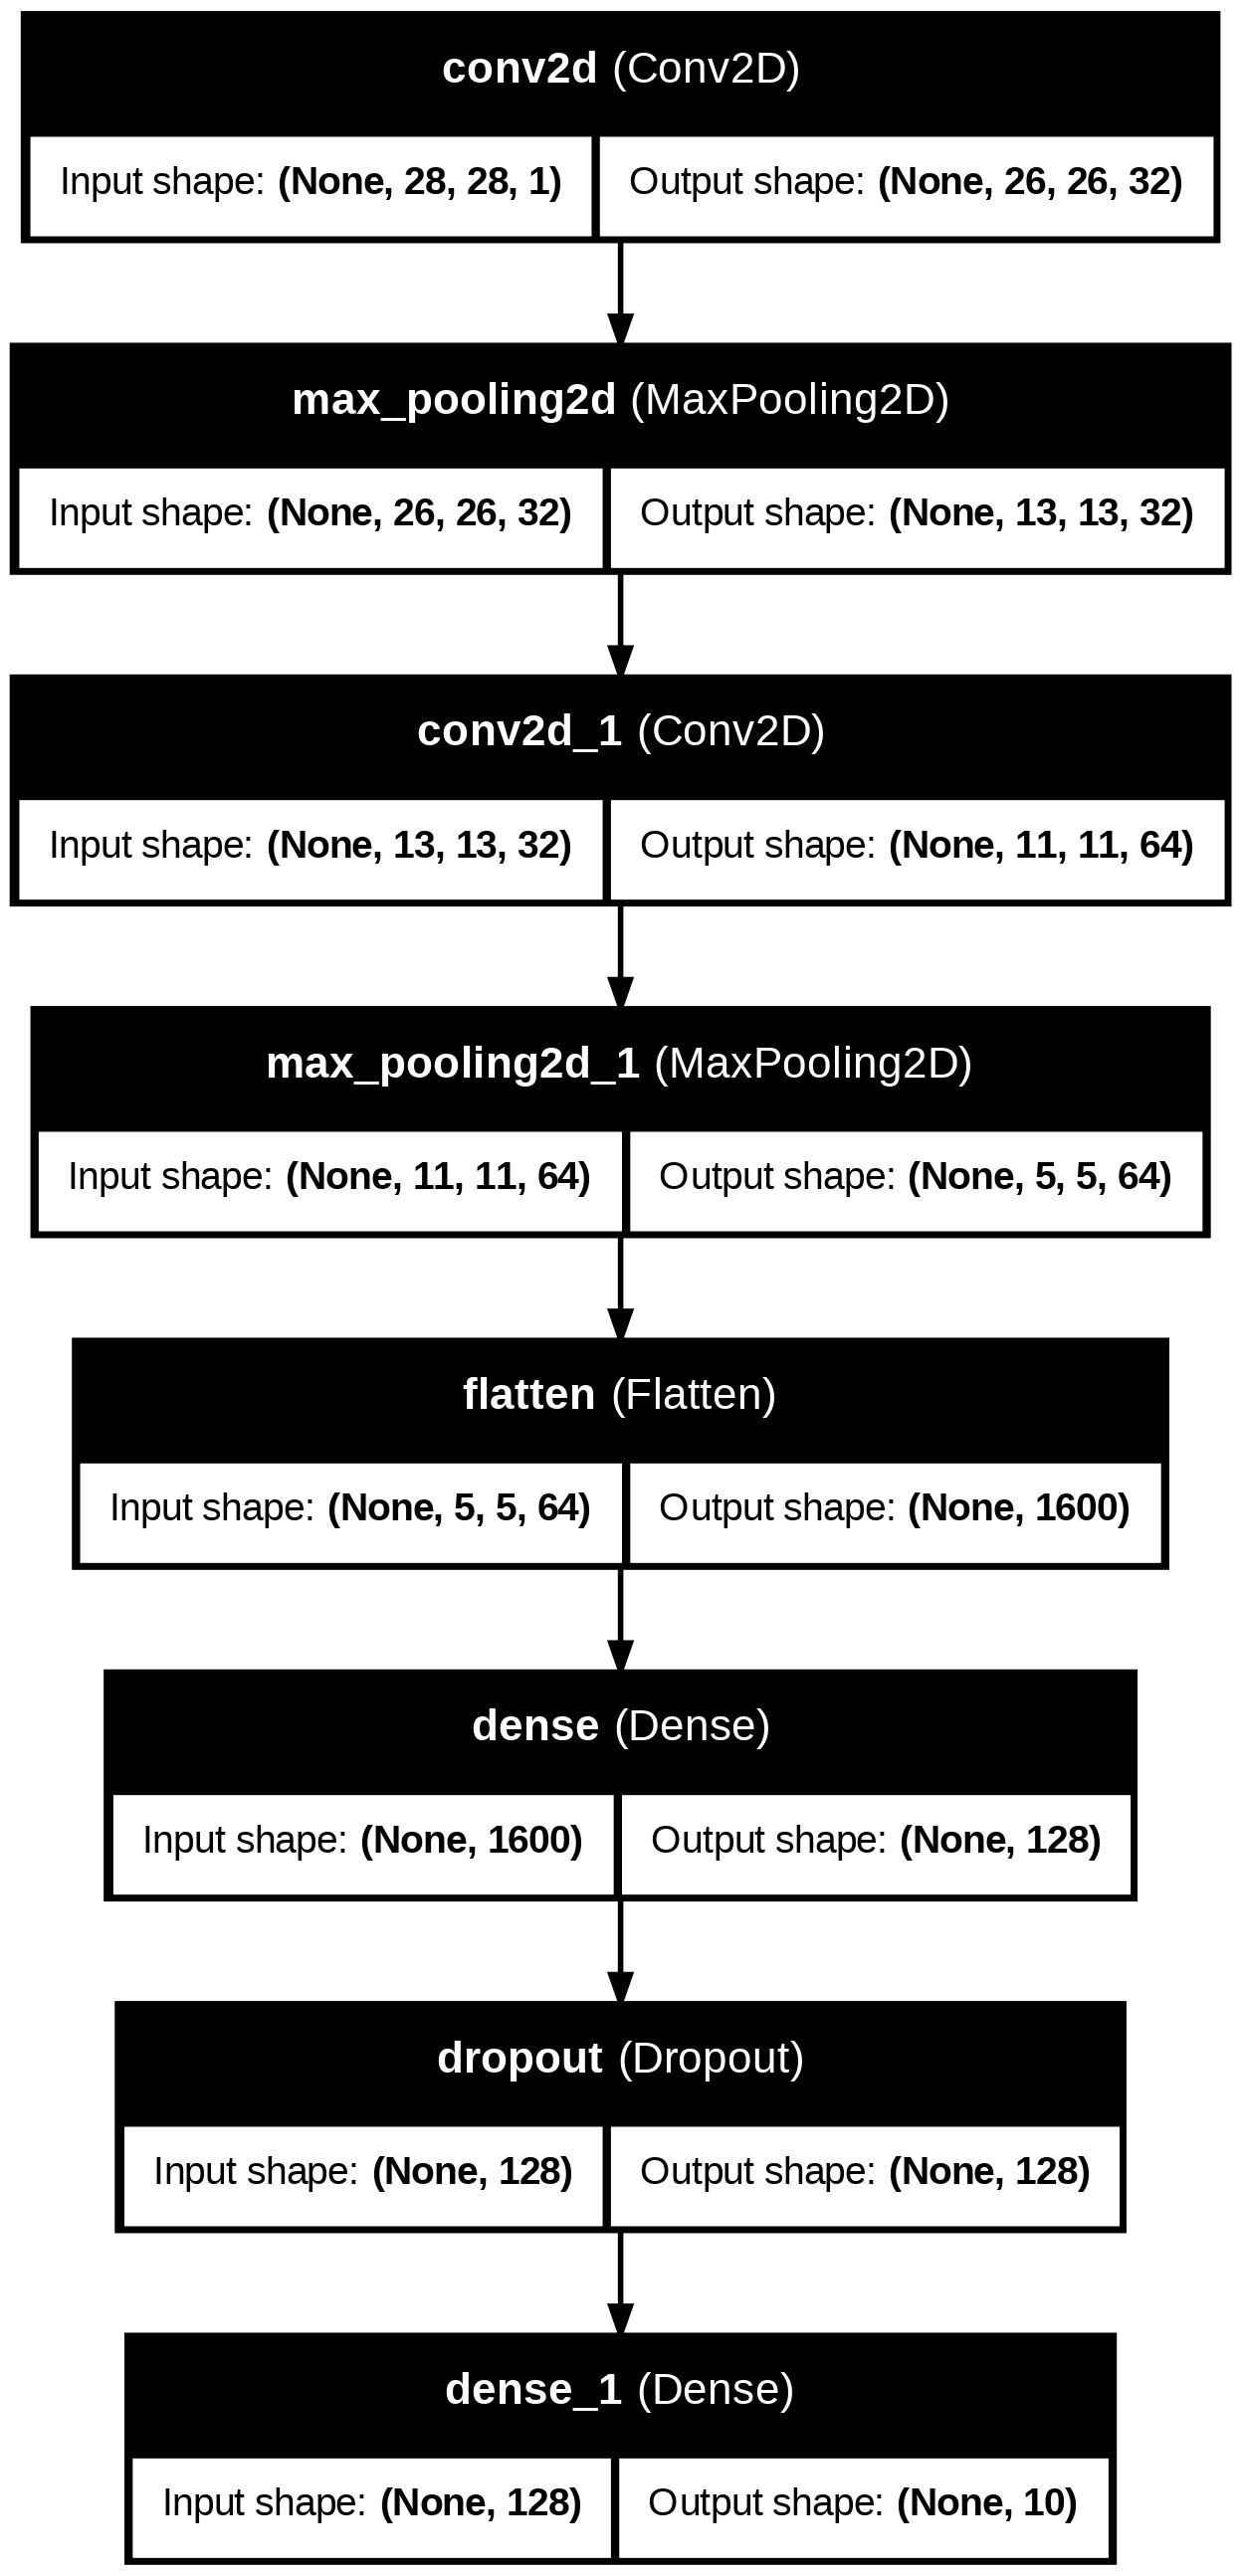

In [ ]:
plot_model(model,show_shapes=True,show_layer_names=True)

Goal:

The program builds and trains a Convolutional Neural Network (CNN) for digit classification using the MNIST dataset.
Steps:

Data Preprocessing:
Normalizes pixel values and reshapes images for CNN input.
One-hot encodes labels for multi-class classification.
Model Architecture:
Uses multiple Conv2D and MaxPooling2D layers for feature extraction.
Dense and Dropout layers handle classification and regularization.
Compilation and Training:
Compiles the model with Adam optimizer and trains for 10 epochs.
Evaluation:
Measures model accuracy and saves the trained model.
Visualization:
Predicts and visualizes results on test images.






What is the MNIST dataset?

The MNIST dataset contains 70,000 grayscale images of handwritten digits (0-9), with 60,000 for training and 10,000 for testing.
Why do we normalize pixel values?

Normalization scales pixel values between 0 and 1, making training faster and improving model convergence.
What does one-hot encoding do?

Converts integer labels (e.g., 2) into a binary vector (e.g., [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) for multi-class classification.


What is a CNN?

A Convolutional Neural Network (CNN) is a type of deep learning model optimized for image data. It uses convolutional layers to extract features and pooling layers to reduce dimensionality.
Why do we use MaxPooling2D?

Max pooling reduces the spatial size of feature maps, minimizing computation and preventing overfitting.
What is the role of the Dropout layer?

Dropout randomly disables neurons during training to prevent overfitting.
Why is softmax used in the output layer?

softmax converts the output into probabilities for multi-class classification.





What is categorical crossentropy?

It’s a loss function used for multi-class classification. It measures the difference between predicted probabilities and actual labels.
What does the adam optimizer do?

Adam combines the benefits of RMSProp and SGD, dynamically adjusting learning rates for faster convergence.
What is the significance of validation data during training?

Validation data helps monitor the model’s performance on unseen data and prevents overfitting.









Why do we visualize predictions?

Visualization helps verify if the model is correctly predicting the digits.
What does np.argmax(predictions[i]) do?

It finds the class with the highest probability (the predicted digit).











1. Basic Architecture of Convolutional Neural Network (CNN) for Image Classification
A CNN processes image data to classify it into different categories. Here's the basic architecture:

***Input Layer:

Accepts images as input (e.g., 28x28 grayscale images in MNIST).
Images are normalized (pixel values between 0 and 1) and reshaped for processing.

***Convolutional Layers:

Extract features like edges, patterns, and shapes from the image using filters/kernels.
Each filter slides over the image to produce feature maps.

***Activation Function (ReLU):

Applies non-linearity after convolution to introduce flexibility in learning complex patterns.

***Pooling Layers (MaxPooling):

Reduces the spatial size of feature maps (downsampling) to focus on the most important features and reduce computation.

***Flatten Layer:

Converts the 2D feature maps into a 1D vector for processing by dense layers.

***Dense Layers:

Fully connected layers that learn high-level features and patterns.
Includes an output layer with softmax activation for multi-class classification.

***Dropout Layer:

Prevents overfitting by randomly disabling neurons during training.












2. Model Summary:
Shows:
Layer types (Conv2D, MaxPooling, Dense, etc.).
Input/Output shapes for each layer.
Trainable parameters for each layer.
Total Parameters: Indicates the trainable parameters in the model.